### How to do Experiment tracking with DVCLive

What you will learn ?
* Fine-tuning a model on a binary text classification task
* Track Machine Learning experiments with DVCLive
* Visualize results and create report

#### Git & Install Dependencies

* Install accelerate , Datasets , evaluate , transformers and dvclive
* Start a Git repo . Your experiments will be saved in a commit but hidden in
order to not clutter your repo.
Initialize DVC

In [ ]:
!pip install dvc pandas
!pip install accelerate datasets dvclive evaluate 'transformers[torch]' --upgrade

In [ ]:
!git init -q
!git config --local user.email "you@example.com"
!git config --local user.name "Your Name"
!dvc init -q
!git commit -m "DVC init"

### Fine-tuning a model on a text classification task
#### Loading the dataset

We will use [imdb](https://huggingface.co/datasets/imdb) Large Movie Review Dataset. This is a dataset for binary
sentiment classification containing a set of 25K movie reviews for traning, and
25K for testing.

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer

dataset = load_dataset("imdb")

#### Preprocessing the data

We use Transformers Tokenizer which transforms the inputs and put them in a format
the model expects.

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-cased")

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

small_train_dataset = dataset["train"].shuffle(seed=42).select(range(2000)).map(tokenize_function, batched=True)
small_eval_dataset = dataset["test"].shuffle(seed=42).select(range(200)).map(tokenize_function, batched=True)

#### Define evaluation metrics

f1 is a metric for combining precision recall metrics in one unique value , so
we take this criteria for evaluating the models.

In [ ]:
import numpy as np
import evaluate

metric = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

### Training and Tracking experiments with DVCLive

Track experiments in DVC by changing a few lines of your Python code.
Enable experiment tracking using ´save_dvc_exp=True´ and ´log_model=True´


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# DVC Report

params.yaml

| output_dir   | overwrite_output_dir   | do_train   | do_eval   | do_predict   | evaluation_strategy   | prediction_loss_only   |   per_device_train_batch_size |   per_device_eval_batch_size | per_gpu_train_batch_size   | per_gpu_eval_batch_size   |   gradient_accumulation_steps | eval_accumulation_steps   |   eval_delay |   learning_rate |   weight_decay |   adam_beta1 |   adam_beta2 |   adam_epsilon |   max_grad_norm |   num_train_epochs |   max_steps | lr_scheduler_type   |   warmup_ratio |   warmup_steps | log_level   | log_level_replica   | log_on_each_node   | logging_dir                                | logging_strategy   | logging_first_step   |   logging_steps | logging_nan_inf_filter   | save_strategy   |   save_steps | save_total_limit   | save_safetensors   | save_on_each_node   | no_cuda   | use_cpu   | use_mps_device   |   seed | data_seed   | jit_mode_eval   | use_ipex   | bf16   | fp16   | fp16_opt_level   | half_precision_backend   | bf16_full_eval   | fp16_full_eval   | tf32   |   local_rank | ddp_backend   | tpu_num_cores   | tpu_metrics_debug   | debug   | dataloader_drop_last   | eval_steps   |   dataloader_num_workers |   past_index | run_name   | disable_tqdm   | remove_unused_columns   | label_names   | load_best_model_at_end   | metric_for_best_model   | greater_is_better   | ignore_data_skip   | sharded_ddp   | fsdp   |   fsdp_min_num_params |   fsdp_config.min_num_params | fsdp_config.xla   | fsdp_config.xla_fsdp_grad_ckpt   | fsdp_transformer_layer_cls_to_wrap   | deepspeed   |   label_smoothing_factor | optim       | optim_args   | adafactor   | group_by_length   | length_column_name   | report_to   | ddp_find_unused_parameters   | ddp_bucket_cap_mb   | ddp_broadcast_buffers   | dataloader_pin_memory   | skip_memory_metrics   | use_legacy_prediction_loop   | push_to_hub   | resume_from_checkpoint   | hub_model_id   | hub_strategy   | hub_token   | hub_private_repo   | hub_always_push   | gradient_checkpointing   | include_inputs_for_metrics   | fp16_backend   | push_to_hub_model_id   | push_to_hub_organization   | push_to_hub_token   | mp_parameters   | auto_find_batch_size   | full_determinism   | torchdynamo   | ray_scope   |   ddp_timeout | torch_compile   | torch_compile_backend   | torch_compile_mode   | dispatch_batches   |
|--------------|------------------------|------------|-----------|--------------|-----------------------|------------------------|-------------------------------|------------------------------|----------------------------|---------------------------|-------------------------------|---------------------------|--------------|-----------------|----------------|--------------|--------------|----------------|-----------------|--------------------|-------------|---------------------|----------------|----------------|-------------|---------------------|--------------------|--------------------------------------------|--------------------|----------------------|-----------------|--------------------------|-----------------|--------------|--------------------|--------------------|---------------------|-----------|-----------|------------------|--------|-------------|-----------------|------------|--------|--------|------------------|--------------------------|------------------|------------------|--------|--------------|---------------|-----------------|---------------------|---------|------------------------|--------------|--------------------------|--------------|------------|----------------|-------------------------|---------------|--------------------------|-------------------------|---------------------|--------------------|---------------|--------|-----------------------|------------------------------|-------------------|----------------------------------|--------------------------------------|-------------|--------------------------|-------------|--------------|-------------|-------------------|----------------------|-------------|------------------------------|---------------------|-------------------------|-------------------------|-----------------------|------------------------------|---------------|--------------------------|----------------|----------------|-------------|--------------------|-------------------|--------------------------|------------------------------|----------------|------------------------|----------------------------|---------------------|-----------------|------------------------|--------------------|---------------|-------------|---------------|-----------------|-------------------------|----------------------|--------------------|
| output       | True                   | False      | True      | False        | epoch                 | False                  |                             8 |                            8 |                            |                           |                             1 |                           |            0 |          0.0003 |           0.01 |          0.9 |        0.999 |          1e-08 |               1 |                  5 |          -1 | linear              |              0 |              0 | passive     | warning             | True               | output/runs/Sep01_17-09-52_mbp-de-gema.lan | epoch              | False                |             500 | True                     | epoch           |          500 |                    | False              | False               | False     | False     | False            |     42 |             | False           | False      | False  | False  | O1               | auto                     | False            | False            |        |            0 |               |                 | False               | []      | False                  |              |                        0 |           -1 | output     | False          | True                    |               | True                     | loss                    | False               | False              | []            | []     |                     0 |                            0 | False             | False                            |                                      |             |                        0 | adamw_torch |              | False       | False             | length               | []          |                              |                     |                         | True                    | True                  | False                        | False         |                          |                | every_save     | <HUB_TOKEN> | False              | False             | False                    | False                        | auto           |                        |                            | <PUSH_TO_HUB_TOKEN> |                 | False                  | False              |               | last        |          1800 | False           |                         |                      |                    |

metrics.json

|   loss |   learning_rate |   epoch |   step |   eval.loss |   eval.f1 |   eval.runtime |   eval.samples_per_second |   eval.steps_per_second |   train.runtime |   train.samples_per_second |   train.steps_per_second |   train.loss |   total_flos |
|--------|-----------------|---------|--------|-------------|-----------|----------------|---------------------------|-------------------------|-----------------|----------------------------|--------------------------|--------------|--------------|
| 0.4144 |               0 |       5 |     10 |    0.451612 |  0.777778 |         4.9508 |                    40.397 |                    5.05 |         337.999 |                     29.586 |                    3.698 |     0.476002 |  1.32467e+15 |

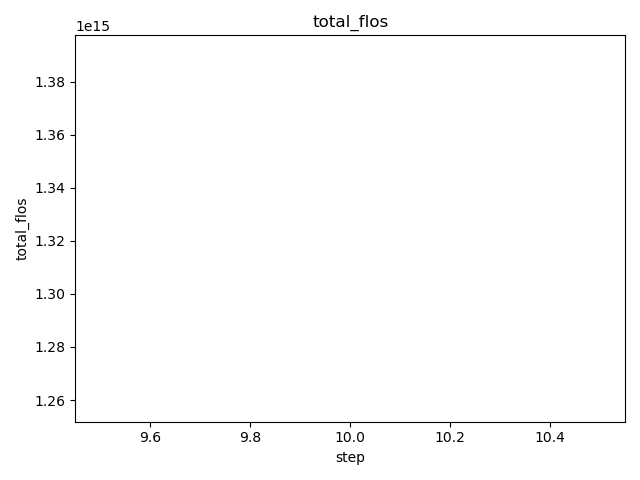

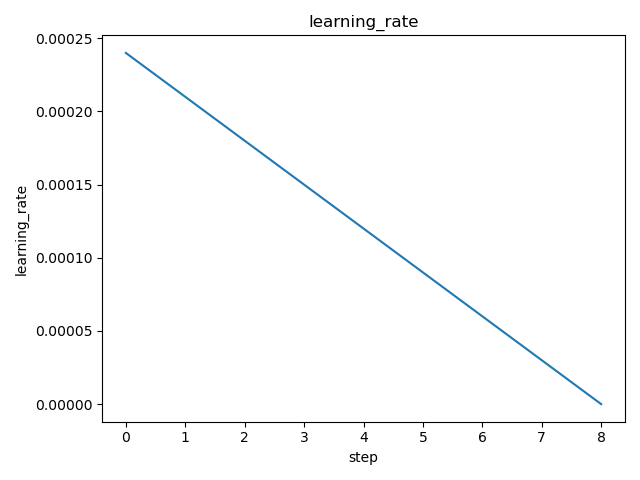

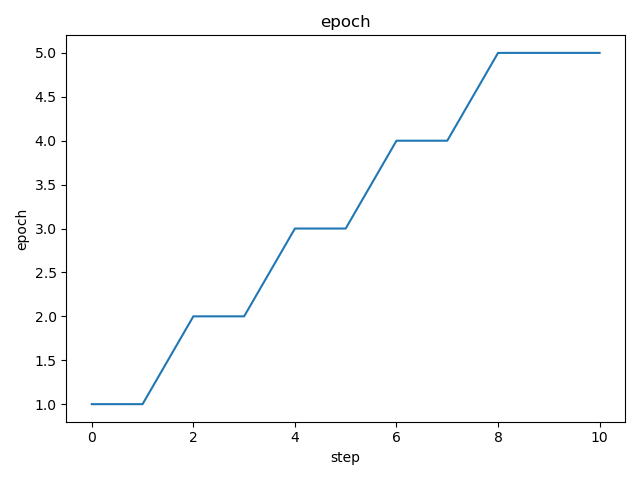

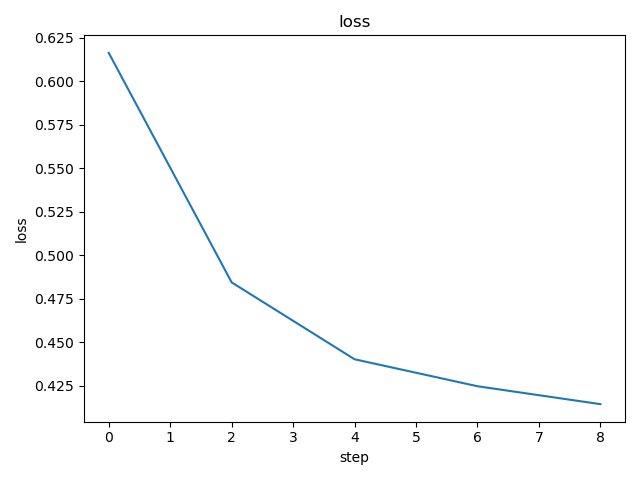

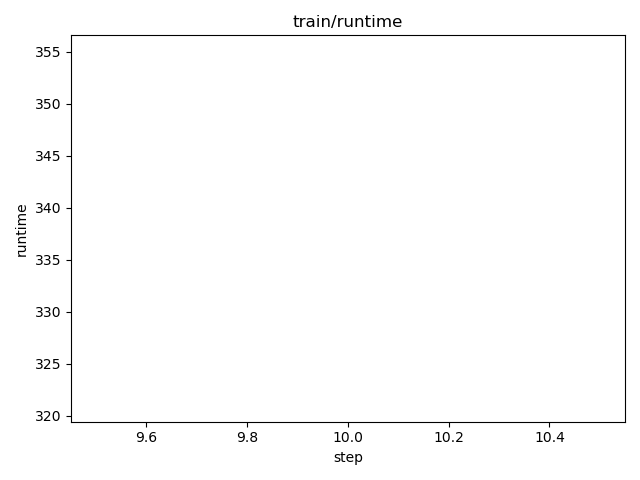

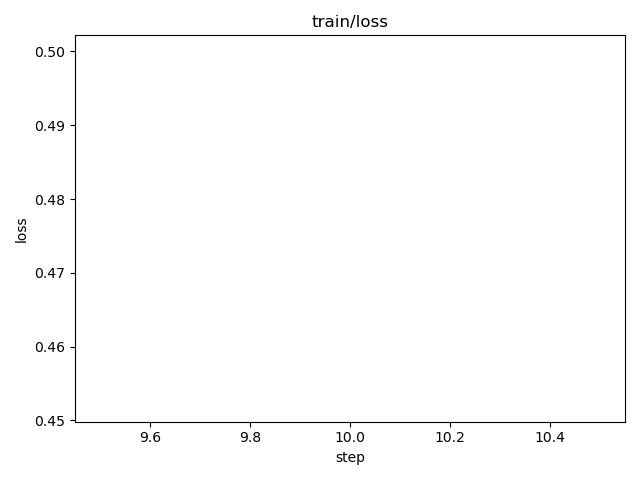

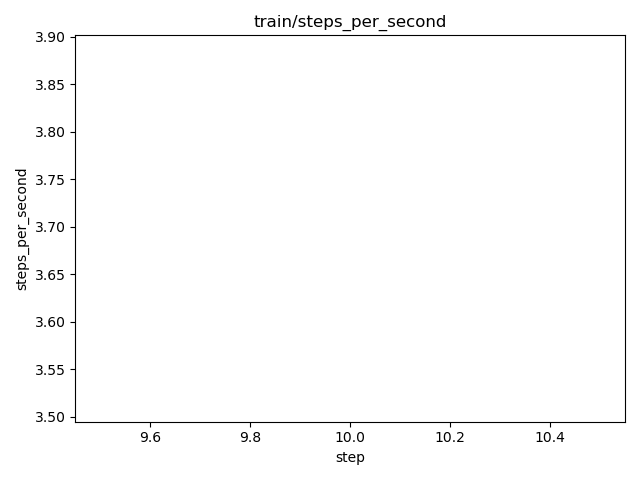

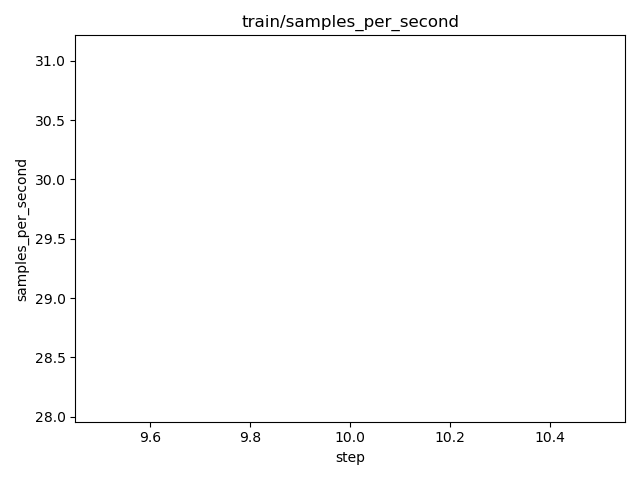

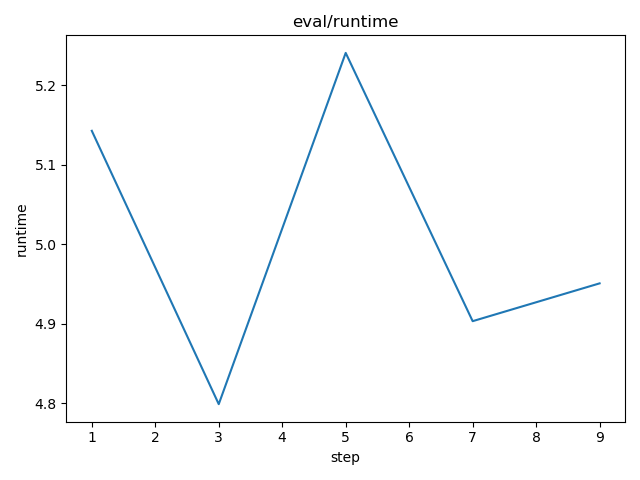

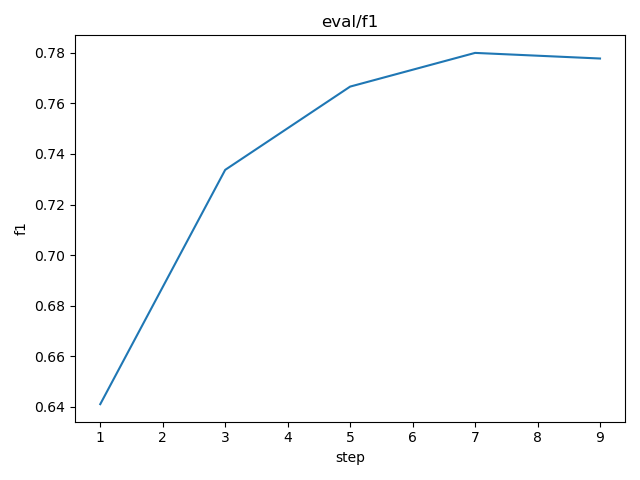

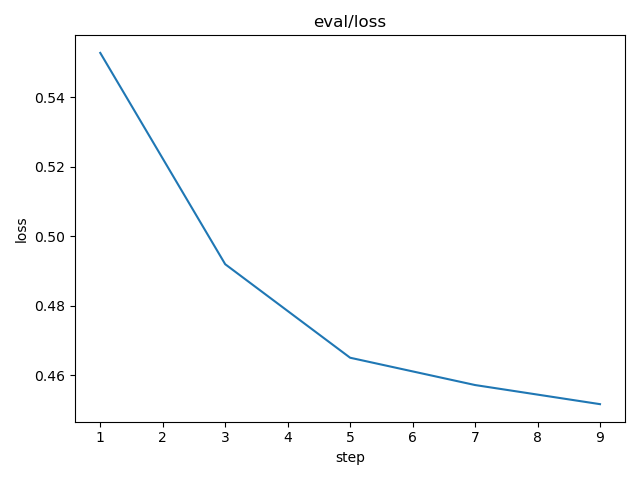

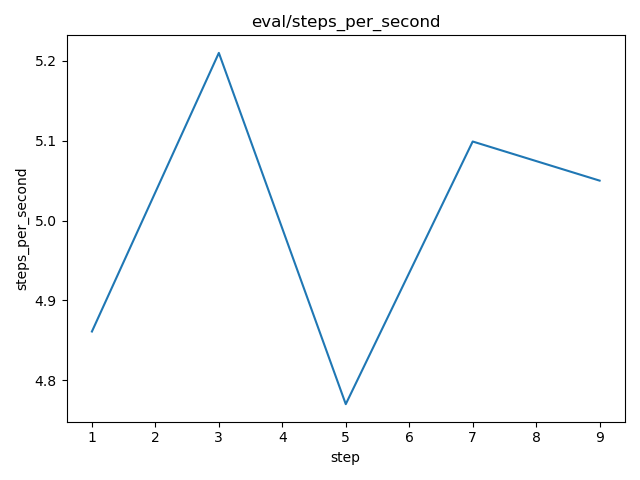

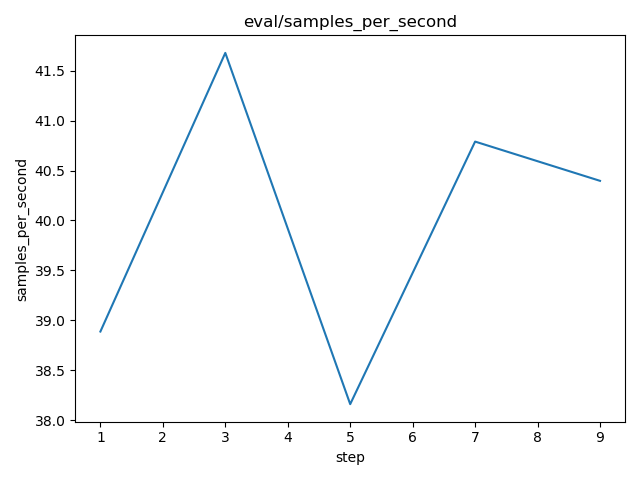


  0%|          | 0/1250 [00:00<?, ?it/s]

{'loss': 0.6163, 'learning_rate': 0.00023999999999999998, 'epoch': 1.0}


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.5528526902198792, 'eval_f1': 0.6410256410256411, 'eval_runtime': 5.1429, 'eval_samples_per_second': 38.888, 'eval_steps_per_second': 4.861, 'epoch': 1.0}
{'loss': 0.4844, 'learning_rate': 0.00017999999999999998, 'epoch': 2.0}


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.4919443428516388, 'eval_f1': 0.7337278106508875, 'eval_runtime': 4.7987, 'eval_samples_per_second': 41.678, 'eval_steps_per_second': 5.21, 'epoch': 2.0}
{'loss': 0.4402, 'learning_rate': 0.00011999999999999999, 'epoch': 3.0}


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.4649907648563385, 'eval_f1': 0.7666666666666666, 'eval_runtime': 5.241, 'eval_samples_per_second': 38.161, 'eval_steps_per_second': 4.77, 'epoch': 3.0}
{'loss': 0.4247, 'learning_rate': 5.9999999999999995e-05, 'epoch': 4.0}


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.4571215808391571, 'eval_f1': 0.78, 'eval_runtime': 4.9032, 'eval_samples_per_second': 40.79, 'eval_steps_per_second': 5.099, 'epoch': 4.0}
{'loss': 0.4144, 'learning_rate': 0.0, 'epoch': 5.0}


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.4516116976737976, 'eval_f1': 0.7777777777777777, 'eval_runtime': 4.9508, 'eval_samples_per_second': 40.397, 'eval_steps_per_second': 5.05, 'epoch': 5.0}
{'train_runtime': 337.9989, 'train_samples_per_second': 29.586, 'train_steps_per_second': 3.698, 'train_loss': 0.4760020080566406, 'epoch': 5.0}


	DVCLive-PyTorch-Lightning.ipynb, DVCLive-HuggingFace.ipynb, DVCLive-YOLO.ipynb, DVCLive-Quickstart.ipynb, DVCLive-scikit-learn.ipynb, output/checkpoint-750/rng_state.pth, output/checkpoint-750/optimizer.pt, output/checkpoint-750/config.json, output/checkpoint-750/scheduler.pt, output/checkpoint-750/training_args.bin, output/checkpoint-750/pytorch_model.bin, output/checkpoint-750/trainer_state.json, output/checkpoint-500/rng_state.pth, output/checkpoint-500/optimizer.pt, output/checkpoint-500/config.json, output/checkpoint-500/scheduler.pt, output/checkpoint-500/training_args.bin, output/checkpoint-500/pytorch_model.bin, output/checkpoint-500/trainer_state.json, output/checkpoint-1250/rng_state.pth, output/checkpoint-1250/optimizer.pt, output/checkpoint-1250/config.json, output/checkpoint-1250/scheduler.pt, output/checkpoint-1250/training_args.bin, output/checkpoint-1250/pytorch_model.bin, output/checkpoint-1250/trainer_state.json, output/checkpoint-1000/rng_state.pth, output/checkpoin

# DVC Report

params.yaml

| output_dir   | overwrite_output_dir   | do_train   | do_eval   | do_predict   | evaluation_strategy   | prediction_loss_only   |   per_device_train_batch_size |   per_device_eval_batch_size | per_gpu_train_batch_size   | per_gpu_eval_batch_size   |   gradient_accumulation_steps | eval_accumulation_steps   |   eval_delay |   learning_rate |   weight_decay |   adam_beta1 |   adam_beta2 |   adam_epsilon |   max_grad_norm |   num_train_epochs |   max_steps | lr_scheduler_type   |   warmup_ratio |   warmup_steps | log_level   | log_level_replica   | log_on_each_node   | logging_dir                                | logging_strategy   | logging_first_step   |   logging_steps | logging_nan_inf_filter   | save_strategy   |   save_steps | save_total_limit   | save_safetensors   | save_on_each_node   | no_cuda   | use_cpu   | use_mps_device   |   seed | data_seed   | jit_mode_eval   | use_ipex   | bf16   | fp16   | fp16_opt_level   | half_precision_backend   | bf16_full_eval   | fp16_full_eval   | tf32   |   local_rank | ddp_backend   | tpu_num_cores   | tpu_metrics_debug   | debug   | dataloader_drop_last   | eval_steps   |   dataloader_num_workers |   past_index | run_name   | disable_tqdm   | remove_unused_columns   | label_names   | load_best_model_at_end   | metric_for_best_model   | greater_is_better   | ignore_data_skip   | sharded_ddp   | fsdp   |   fsdp_min_num_params |   fsdp_config.min_num_params | fsdp_config.xla   | fsdp_config.xla_fsdp_grad_ckpt   | fsdp_transformer_layer_cls_to_wrap   | deepspeed   |   label_smoothing_factor | optim       | optim_args   | adafactor   | group_by_length   | length_column_name   | report_to   | ddp_find_unused_parameters   | ddp_bucket_cap_mb   | ddp_broadcast_buffers   | dataloader_pin_memory   | skip_memory_metrics   | use_legacy_prediction_loop   | push_to_hub   | resume_from_checkpoint   | hub_model_id   | hub_strategy   | hub_token   | hub_private_repo   | hub_always_push   | gradient_checkpointing   | include_inputs_for_metrics   | fp16_backend   | push_to_hub_model_id   | push_to_hub_organization   | push_to_hub_token   | mp_parameters   | auto_find_batch_size   | full_determinism   | torchdynamo   | ray_scope   |   ddp_timeout | torch_compile   | torch_compile_backend   | torch_compile_mode   | dispatch_batches   |
|--------------|------------------------|------------|-----------|--------------|-----------------------|------------------------|-------------------------------|------------------------------|----------------------------|---------------------------|-------------------------------|---------------------------|--------------|-----------------|----------------|--------------|--------------|----------------|-----------------|--------------------|-------------|---------------------|----------------|----------------|-------------|---------------------|--------------------|--------------------------------------------|--------------------|----------------------|-----------------|--------------------------|-----------------|--------------|--------------------|--------------------|---------------------|-----------|-----------|------------------|--------|-------------|-----------------|------------|--------|--------|------------------|--------------------------|------------------|------------------|--------|--------------|---------------|-----------------|---------------------|---------|------------------------|--------------|--------------------------|--------------|------------|----------------|-------------------------|---------------|--------------------------|-------------------------|---------------------|--------------------|---------------|--------|-----------------------|------------------------------|-------------------|----------------------------------|--------------------------------------|-------------|--------------------------|-------------|--------------|-------------|-------------------|----------------------|-------------|------------------------------|---------------------|-------------------------|-------------------------|-----------------------|------------------------------|---------------|--------------------------|----------------|----------------|-------------|--------------------|-------------------|--------------------------|------------------------------|----------------|------------------------|----------------------------|---------------------|-----------------|------------------------|--------------------|---------------|-------------|---------------|-----------------|-------------------------|----------------------|--------------------|
| output       | True                   | False      | True      | False        | epoch                 | False                  |                             8 |                            8 |                            |                           |                             1 |                           |            0 |          0.0003 |           0.01 |          0.9 |        0.999 |          1e-08 |               1 |                 10 |          -1 | linear              |              0 |              0 | passive     | warning             | True               | output/runs/Sep01_17-15-34_mbp-de-gema.lan | epoch              | False                |             500 | True                     | epoch           |          500 |                    | False              | False               | False     | False     | False            |     42 |             | False           | False      | False  | False  | O1               | auto                     | False            | False            |        |            0 |               |                 | False               | []      | False                  |              |                        0 |           -1 | output     | False          | True                    |               | True                     | loss                    | False               | False              | []            | []     |                     0 |                            0 | False             | False                            |                                      |             |                        0 | adamw_torch |              | False       | False             | length               | []          |                              |                     |                         | True                    | True                  | False                        | False         |                          |                | every_save     | <HUB_TOKEN> | False              | False             | False                    | False                        | auto           |                        |                            | <PUSH_TO_HUB_TOKEN> |                 | False                  | False              |               | last        |          1800 | False           |                         |                      |                    |

metrics.json

|   loss |   learning_rate |   epoch |   step |   eval.loss |   eval.f1 |   eval.runtime |   eval.samples_per_second |   eval.steps_per_second |   train.runtime |   train.samples_per_second |   train.steps_per_second |   train.loss |   total_flos |
|--------|-----------------|---------|--------|-------------|-----------|----------------|---------------------------|-------------------------|-----------------|----------------------------|--------------------------|--------------|--------------|
| 0.3824 |               0 |      10 |     20 |    0.413206 |  0.818653 |         4.9895 |                    40.084 |                    5.01 |         695.251 |                     28.767 |                    3.596 |     0.437789 |  2.64935e+15 |

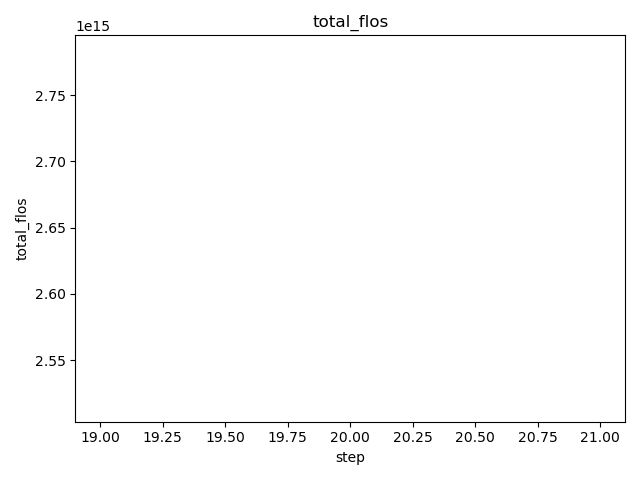

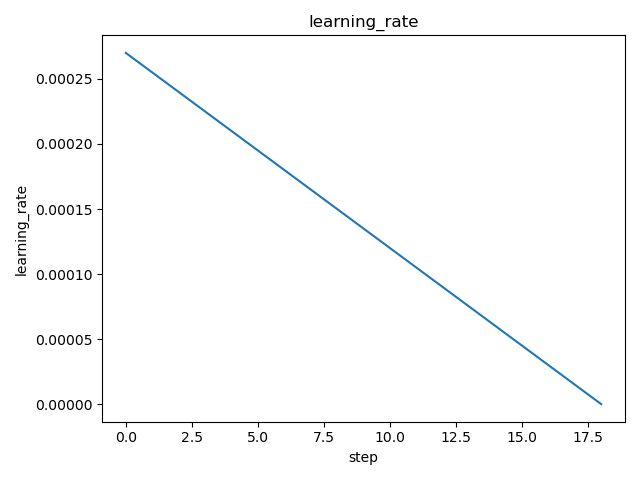

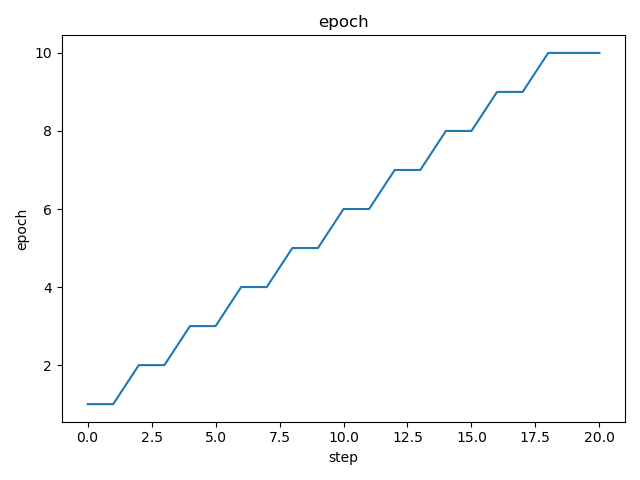

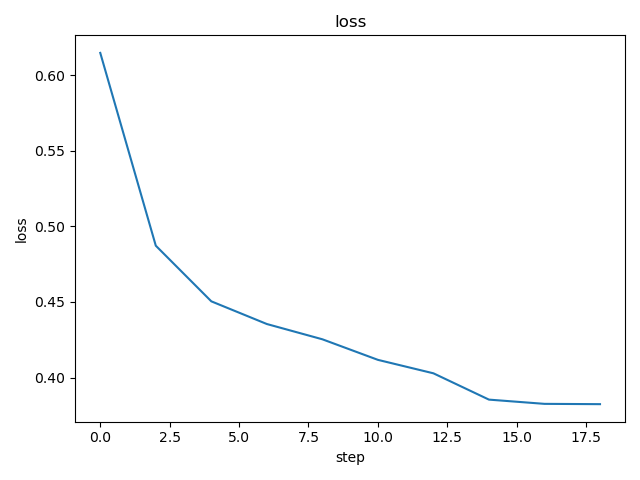

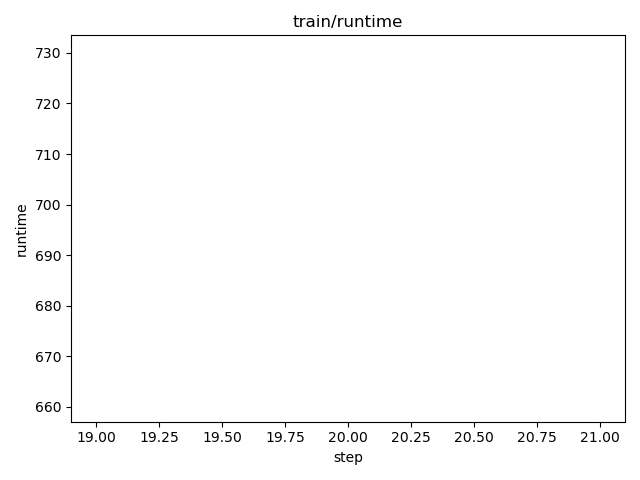

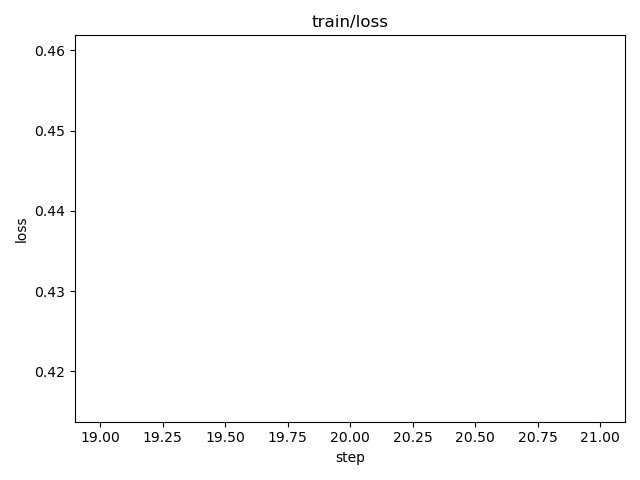

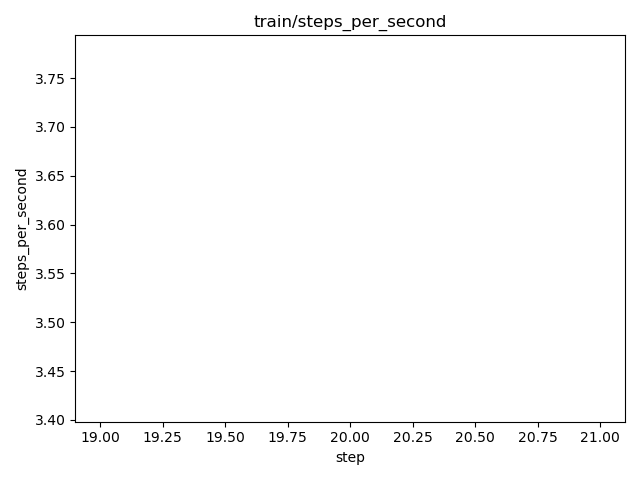

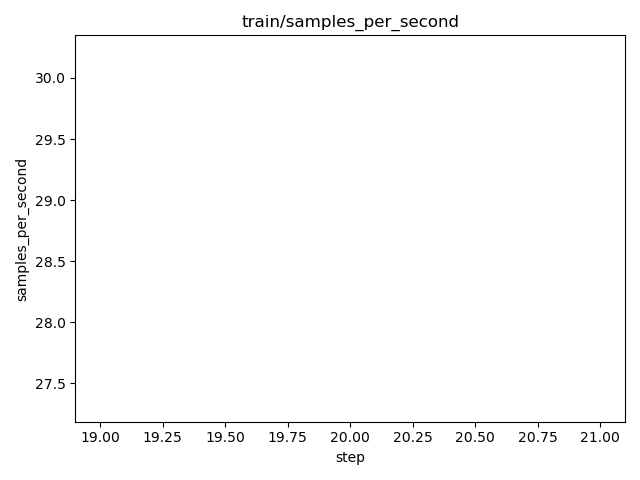

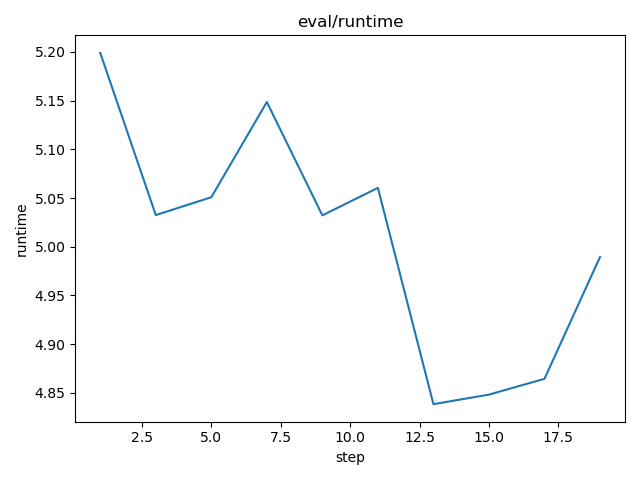

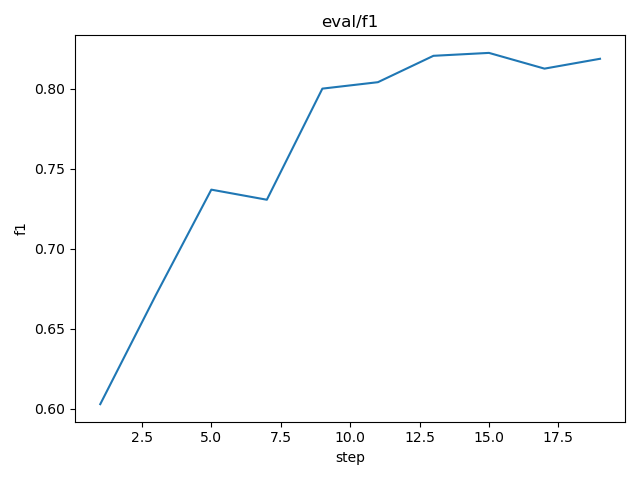

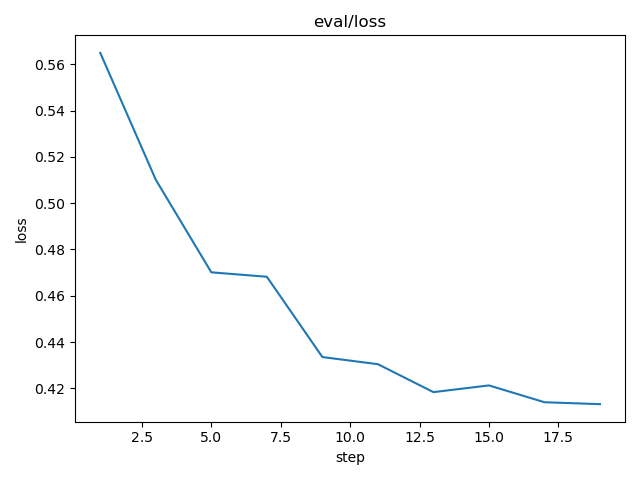

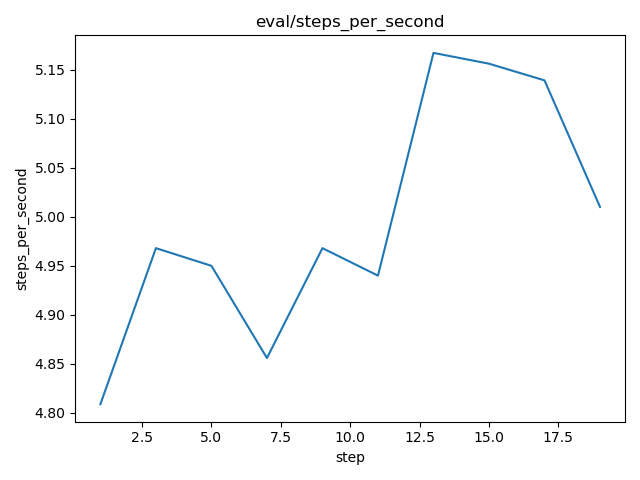

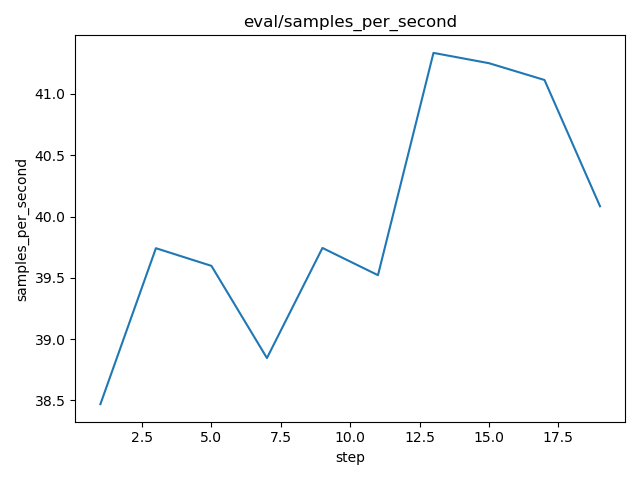


  0%|          | 0/2500 [00:00<?, ?it/s]

{'loss': 0.6147, 'learning_rate': 0.00027, 'epoch': 1.0}


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.5648993849754333, 'eval_f1': 0.6027397260273972, 'eval_runtime': 5.1989, 'eval_samples_per_second': 38.47, 'eval_steps_per_second': 4.809, 'epoch': 1.0}
{'loss': 0.4872, 'learning_rate': 0.00023999999999999998, 'epoch': 2.0}


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.5101255178451538, 'eval_f1': 0.6708860759493671, 'eval_runtime': 5.0325, 'eval_samples_per_second': 39.742, 'eval_steps_per_second': 4.968, 'epoch': 2.0}
{'loss': 0.4504, 'learning_rate': 0.00020999999999999998, 'epoch': 3.0}


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.4701372981071472, 'eval_f1': 0.736842105263158, 'eval_runtime': 5.0508, 'eval_samples_per_second': 39.598, 'eval_steps_per_second': 4.95, 'epoch': 3.0}
{'loss': 0.4354, 'learning_rate': 0.00017999999999999998, 'epoch': 4.0}


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.4682260751724243, 'eval_f1': 0.7305389221556885, 'eval_runtime': 5.1485, 'eval_samples_per_second': 38.846, 'eval_steps_per_second': 4.856, 'epoch': 4.0}
{'loss': 0.4253, 'learning_rate': 0.00015, 'epoch': 5.0}


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.4335494339466095, 'eval_f1': 0.8, 'eval_runtime': 5.0322, 'eval_samples_per_second': 39.744, 'eval_steps_per_second': 4.968, 'epoch': 5.0}
{'loss': 0.4117, 'learning_rate': 0.00011999999999999999, 'epoch': 6.0}


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.43046432733535767, 'eval_f1': 0.8040201005025125, 'eval_runtime': 5.0604, 'eval_samples_per_second': 39.522, 'eval_steps_per_second': 4.94, 'epoch': 6.0}
{'loss': 0.4028, 'learning_rate': 8.999999999999999e-05, 'epoch': 7.0}


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.4184027910232544, 'eval_f1': 0.8205128205128206, 'eval_runtime': 4.8385, 'eval_samples_per_second': 41.335, 'eval_steps_per_second': 5.167, 'epoch': 7.0}
{'loss': 0.3854, 'learning_rate': 5.9999999999999995e-05, 'epoch': 8.0}


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.42130035161972046, 'eval_f1': 0.8223350253807107, 'eval_runtime': 4.8483, 'eval_samples_per_second': 41.251, 'eval_steps_per_second': 5.156, 'epoch': 8.0}
{'loss': 0.3826, 'learning_rate': 2.9999999999999997e-05, 'epoch': 9.0}


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.4140377342700958, 'eval_f1': 0.8125, 'eval_runtime': 4.8645, 'eval_samples_per_second': 41.114, 'eval_steps_per_second': 5.139, 'epoch': 9.0}
{'loss': 0.3824, 'learning_rate': 0.0, 'epoch': 10.0}


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.4132063388824463, 'eval_f1': 0.8186528497409326, 'eval_runtime': 4.9895, 'eval_samples_per_second': 40.084, 'eval_steps_per_second': 5.01, 'epoch': 10.0}
{'train_runtime': 695.2514, 'train_samples_per_second': 28.767, 'train_steps_per_second': 3.596, 'train_loss': 0.43778896484375, 'epoch': 10.0}


	DVCLive-PyTorch-Lightning.ipynb, DVCLive-HuggingFace.ipynb, DVCLive-YOLO.ipynb, DVCLive-Quickstart.ipynb, DVCLive-scikit-learn.ipynb, output/checkpoint-2500/rng_state.pth, output/checkpoint-2500/optimizer.pt, output/checkpoint-2500/config.json, output/checkpoint-2500/scheduler.pt, output/checkpoint-2500/training_args.bin, output/checkpoint-2500/pytorch_model.bin, output/checkpoint-2500/trainer_state.json, output/checkpoint-750/rng_state.pth, output/checkpoint-750/optimizer.pt, output/checkpoint-750/config.json, output/checkpoint-750/scheduler.pt, output/checkpoint-750/training_args.bin, output/checkpoint-750/pytorch_model.bin, output/checkpoint-750/trainer_state.json, output/checkpoint-500/rng_state.pth, output/checkpoint-500/optimizer.pt, output/checkpoint-500/config.json, output/checkpoint-500/scheduler.pt, output/checkpoint-500/training_args.bin, output/checkpoint-500/pytorch_model.bin, output/checkpoint-500/trainer_state.json, output/checkpoint-1250/rng_state.pth, output/checkpoin

# DVC Report

params.yaml

| output_dir   | overwrite_output_dir   | do_train   | do_eval   | do_predict   | evaluation_strategy   | prediction_loss_only   |   per_device_train_batch_size |   per_device_eval_batch_size | per_gpu_train_batch_size   | per_gpu_eval_batch_size   |   gradient_accumulation_steps | eval_accumulation_steps   |   eval_delay |   learning_rate |   weight_decay |   adam_beta1 |   adam_beta2 |   adam_epsilon |   max_grad_norm |   num_train_epochs |   max_steps | lr_scheduler_type   |   warmup_ratio |   warmup_steps | log_level   | log_level_replica   | log_on_each_node   | logging_dir                                | logging_strategy   | logging_first_step   |   logging_steps | logging_nan_inf_filter   | save_strategy   |   save_steps | save_total_limit   | save_safetensors   | save_on_each_node   | no_cuda   | use_cpu   | use_mps_device   |   seed | data_seed   | jit_mode_eval   | use_ipex   | bf16   | fp16   | fp16_opt_level   | half_precision_backend   | bf16_full_eval   | fp16_full_eval   | tf32   |   local_rank | ddp_backend   | tpu_num_cores   | tpu_metrics_debug   | debug   | dataloader_drop_last   | eval_steps   |   dataloader_num_workers |   past_index | run_name   | disable_tqdm   | remove_unused_columns   | label_names   | load_best_model_at_end   | metric_for_best_model   | greater_is_better   | ignore_data_skip   | sharded_ddp   | fsdp   |   fsdp_min_num_params |   fsdp_config.min_num_params | fsdp_config.xla   | fsdp_config.xla_fsdp_grad_ckpt   | fsdp_transformer_layer_cls_to_wrap   | deepspeed   |   label_smoothing_factor | optim       | optim_args   | adafactor   | group_by_length   | length_column_name   | report_to   | ddp_find_unused_parameters   | ddp_bucket_cap_mb   | ddp_broadcast_buffers   | dataloader_pin_memory   | skip_memory_metrics   | use_legacy_prediction_loop   | push_to_hub   | resume_from_checkpoint   | hub_model_id   | hub_strategy   | hub_token   | hub_private_repo   | hub_always_push   | gradient_checkpointing   | include_inputs_for_metrics   | fp16_backend   | push_to_hub_model_id   | push_to_hub_organization   | push_to_hub_token   | mp_parameters   | auto_find_batch_size   | full_determinism   | torchdynamo   | ray_scope   |   ddp_timeout | torch_compile   | torch_compile_backend   | torch_compile_mode   | dispatch_batches   |
|--------------|------------------------|------------|-----------|--------------|-----------------------|------------------------|-------------------------------|------------------------------|----------------------------|---------------------------|-------------------------------|---------------------------|--------------|-----------------|----------------|--------------|--------------|----------------|-----------------|--------------------|-------------|---------------------|----------------|----------------|-------------|---------------------|--------------------|--------------------------------------------|--------------------|----------------------|-----------------|--------------------------|-----------------|--------------|--------------------|--------------------|---------------------|-----------|-----------|------------------|--------|-------------|-----------------|------------|--------|--------|------------------|--------------------------|------------------|------------------|--------|--------------|---------------|-----------------|---------------------|---------|------------------------|--------------|--------------------------|--------------|------------|----------------|-------------------------|---------------|--------------------------|-------------------------|---------------------|--------------------|---------------|--------|-----------------------|------------------------------|-------------------|----------------------------------|--------------------------------------|-------------|--------------------------|-------------|--------------|-------------|-------------------|----------------------|-------------|------------------------------|---------------------|-------------------------|-------------------------|-----------------------|------------------------------|---------------|--------------------------|----------------|----------------|-------------|--------------------|-------------------|--------------------------|------------------------------|----------------|------------------------|----------------------------|---------------------|-----------------|------------------------|--------------------|---------------|-------------|---------------|-----------------|-------------------------|----------------------|--------------------|
| output       | True                   | False      | True      | False        | epoch                 | False                  |                             8 |                            8 |                            |                           |                             1 |                           |            0 |          0.0003 |           0.01 |          0.9 |        0.999 |          1e-08 |               1 |                 15 |          -1 | linear              |              0 |              0 | passive     | warning             | True               | output/runs/Sep01_17-27-13_mbp-de-gema.lan | epoch              | False                |             500 | True                     | epoch           |          500 |                    | False              | False               | False     | False     | False            |     42 |             | False           | False      | False  | False  | O1               | auto                     | False            | False            |        |            0 |               |                 | False               | []      | False                  |              |                        0 |           -1 | output     | False          | True                    |               | True                     | loss                    | False               | False              | []            | []     |                     0 |                            0 | False             | False                            |                                      |             |                        0 | adamw_torch |              | False       | False             | length               | []          |                              |                     |                         | True                    | True                  | False                        | False         |                          |                | every_save     | <HUB_TOKEN> | False              | False             | False                    | False                        | auto           |                        |                            | <PUSH_TO_HUB_TOKEN> |                 | False                  | False              |               | last        |          1800 | False           |                         |                      |                    |

metrics.json

|   loss |   learning_rate |   epoch |   step |   eval.loss |   eval.f1 |   eval.runtime |   eval.samples_per_second |   eval.steps_per_second |   train.runtime |   train.samples_per_second |   train.steps_per_second |   train.loss |   total_flos |
|--------|-----------------|---------|--------|-------------|-----------|----------------|---------------------------|-------------------------|-----------------|----------------------------|--------------------------|--------------|--------------|
| 0.3664 |               0 |      15 |     30 |    0.400853 |  0.839378 |         5.0167 |                    39.867 |                   4.983 |          1545.6 |                      19.41 |                    2.426 |     0.416928 |  3.97402e+15 |

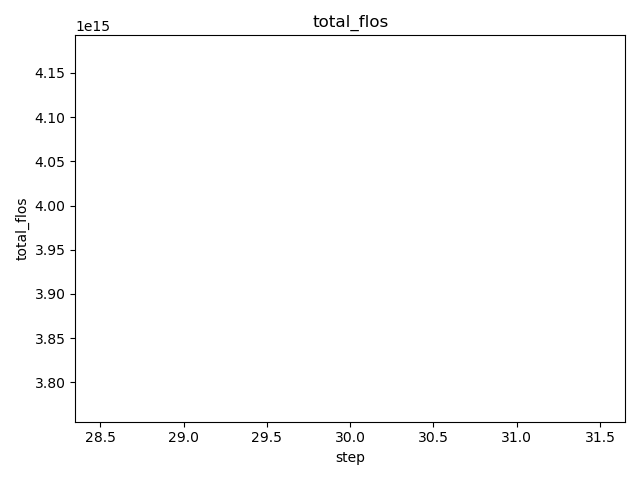

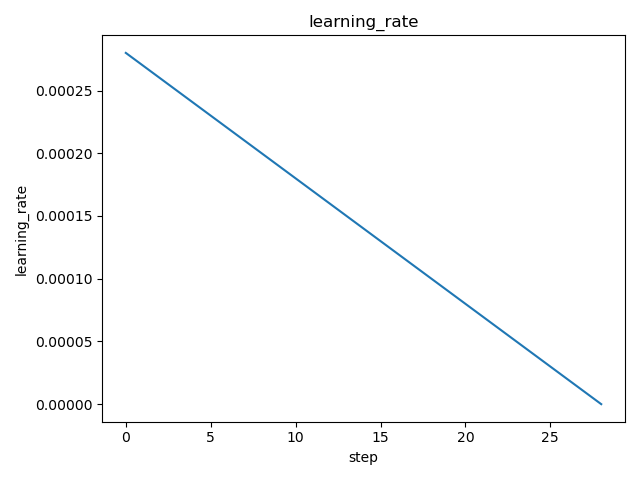

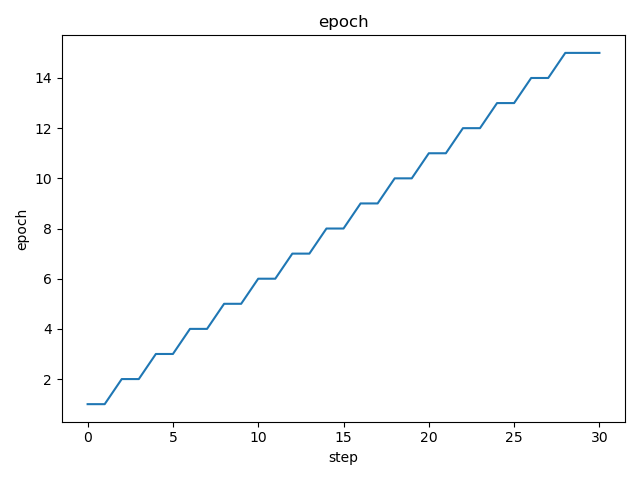

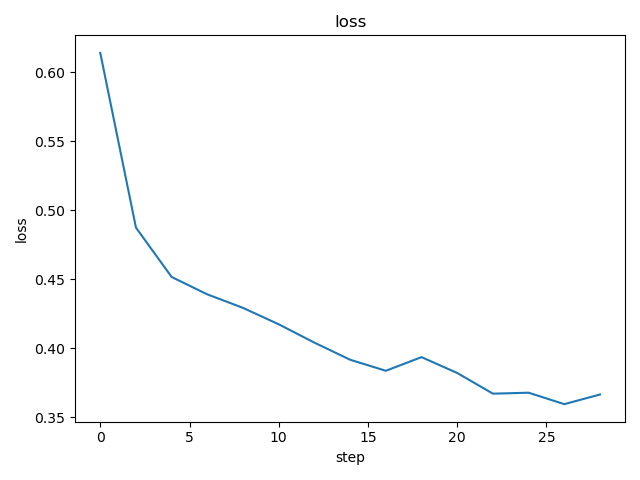

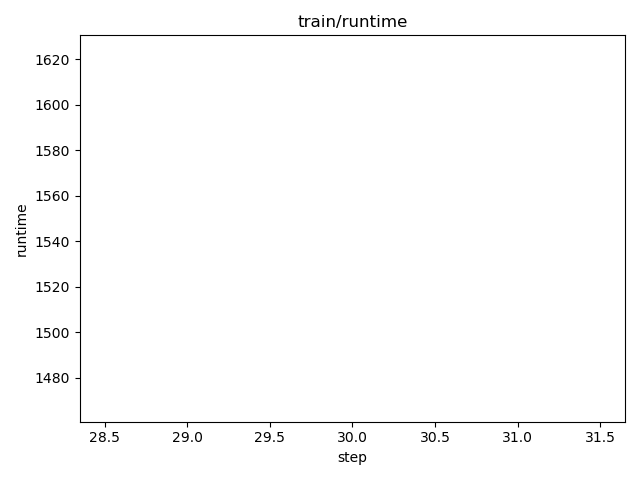

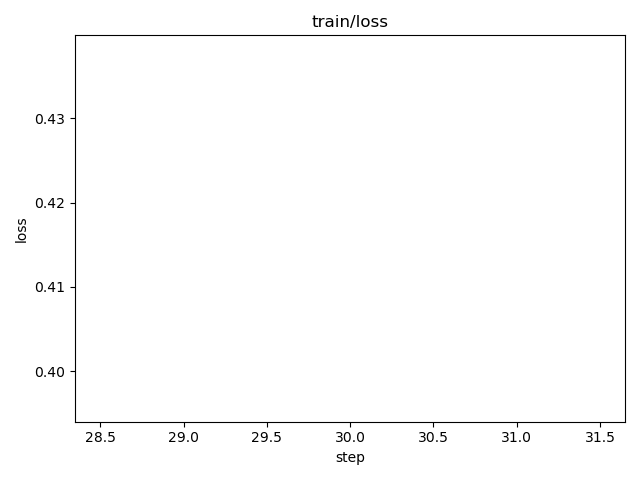

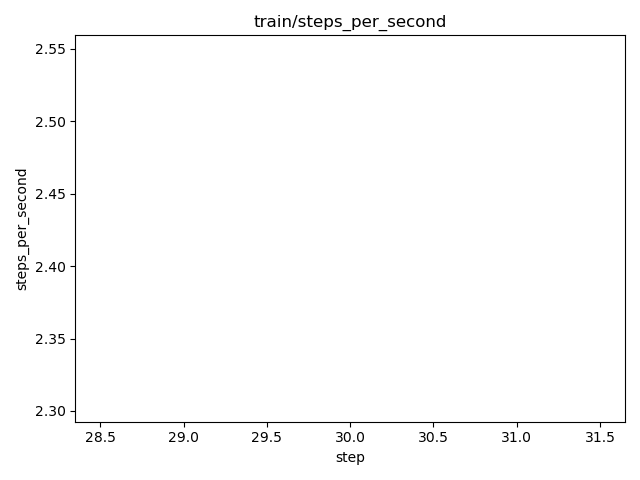

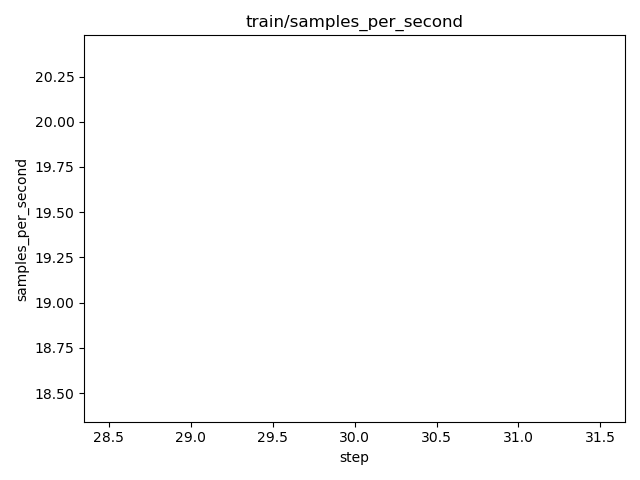

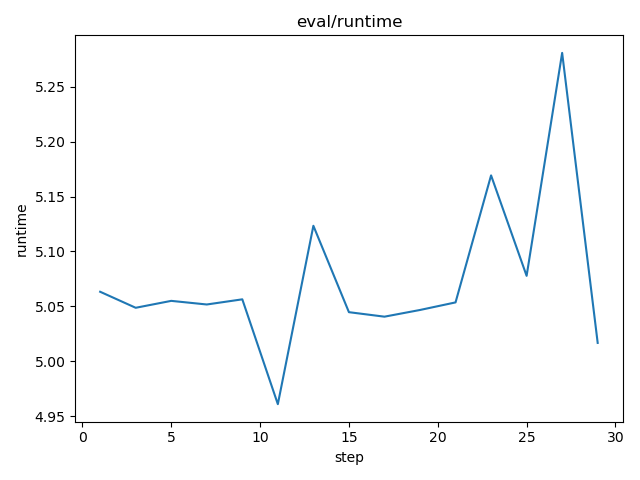

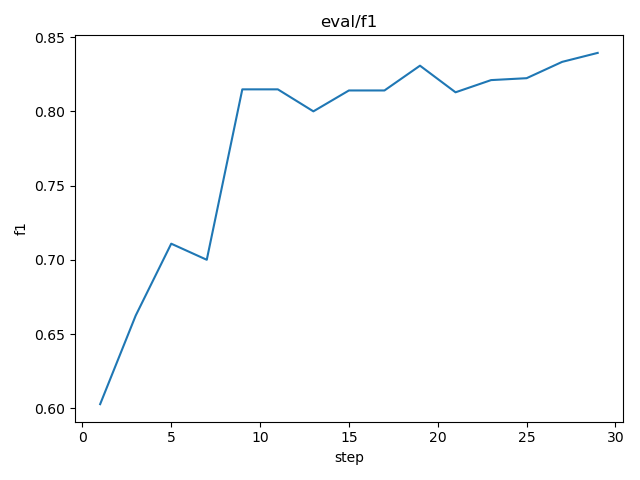

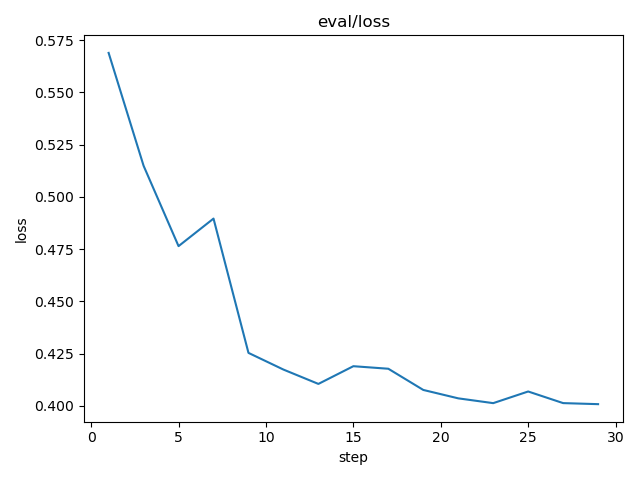

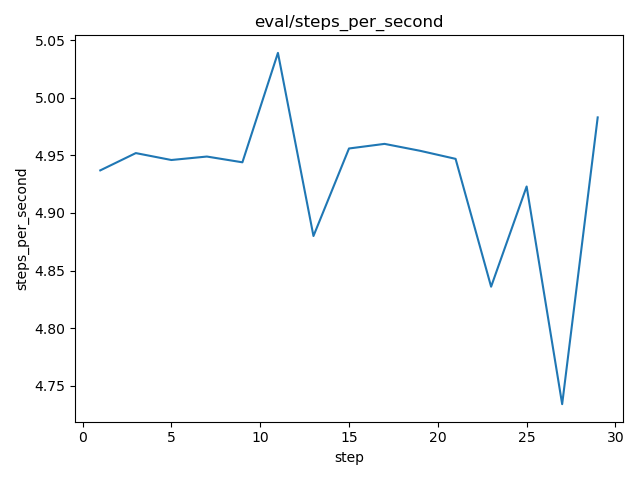

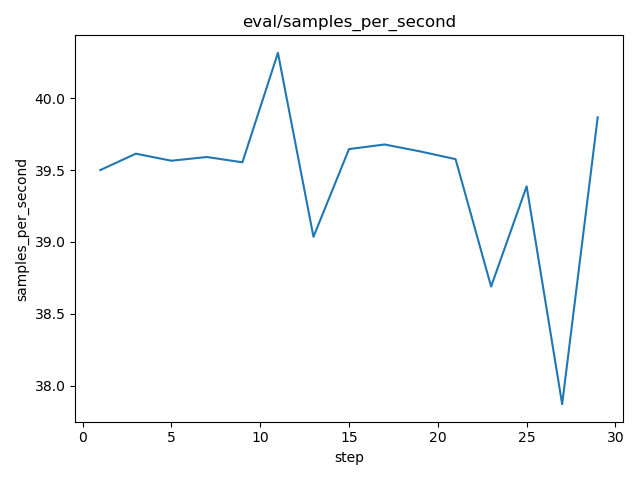


  0%|          | 0/3750 [00:00<?, ?it/s]

{'loss': 0.6141, 'learning_rate': 0.00028, 'epoch': 1.0}


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.5689023733139038, 'eval_f1': 0.6027397260273972, 'eval_runtime': 5.0633, 'eval_samples_per_second': 39.5, 'eval_steps_per_second': 4.937, 'epoch': 1.0}
{'loss': 0.4874, 'learning_rate': 0.00026, 'epoch': 2.0}


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.5149034261703491, 'eval_f1': 0.6624203821656051, 'eval_runtime': 5.0487, 'eval_samples_per_second': 39.614, 'eval_steps_per_second': 4.952, 'epoch': 2.0}
{'loss': 0.4516, 'learning_rate': 0.00023999999999999998, 'epoch': 3.0}


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.47645437717437744, 'eval_f1': 0.7108433734939759, 'eval_runtime': 5.055, 'eval_samples_per_second': 39.565, 'eval_steps_per_second': 4.946, 'epoch': 3.0}
{'loss': 0.439, 'learning_rate': 0.00021999999999999995, 'epoch': 4.0}


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.48963338136672974, 'eval_f1': 0.7000000000000001, 'eval_runtime': 5.0517, 'eval_samples_per_second': 39.591, 'eval_steps_per_second': 4.949, 'epoch': 4.0}
{'loss': 0.4292, 'learning_rate': 0.00019999999999999998, 'epoch': 5.0}


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.4253861904144287, 'eval_f1': 0.8148148148148148, 'eval_runtime': 5.0564, 'eval_samples_per_second': 39.554, 'eval_steps_per_second': 4.944, 'epoch': 5.0}
{'loss': 0.4173, 'learning_rate': 0.00017999999999999998, 'epoch': 6.0}


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.4174001216888428, 'eval_f1': 0.8148148148148148, 'eval_runtime': 4.9609, 'eval_samples_per_second': 40.315, 'eval_steps_per_second': 5.039, 'epoch': 6.0}
{'loss': 0.404, 'learning_rate': 0.00015999999999999999, 'epoch': 7.0}


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.4105360507965088, 'eval_f1': 0.8000000000000002, 'eval_runtime': 5.1234, 'eval_samples_per_second': 39.036, 'eval_steps_per_second': 4.88, 'epoch': 7.0}
{'loss': 0.3916, 'learning_rate': 0.00014, 'epoch': 8.0}


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.4190116822719574, 'eval_f1': 0.8140703517587939, 'eval_runtime': 5.0447, 'eval_samples_per_second': 39.646, 'eval_steps_per_second': 4.956, 'epoch': 8.0}
{'loss': 0.3836, 'learning_rate': 0.00011999999999999999, 'epoch': 9.0}


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.4177964925765991, 'eval_f1': 0.8140703517587939, 'eval_runtime': 5.0406, 'eval_samples_per_second': 39.678, 'eval_steps_per_second': 4.96, 'epoch': 9.0}
{'loss': 0.3935, 'learning_rate': 9.999999999999999e-05, 'epoch': 10.0}


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.4076541066169739, 'eval_f1': 0.8307692307692308, 'eval_runtime': 5.0467, 'eval_samples_per_second': 39.63, 'eval_steps_per_second': 4.954, 'epoch': 10.0}
{'loss': 0.382, 'learning_rate': 7.999999999999999e-05, 'epoch': 11.0}


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.4036329686641693, 'eval_f1': 0.8128342245989305, 'eval_runtime': 5.0536, 'eval_samples_per_second': 39.576, 'eval_steps_per_second': 4.947, 'epoch': 11.0}
{'loss': 0.367, 'learning_rate': 5.9999999999999995e-05, 'epoch': 12.0}


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.4013388454914093, 'eval_f1': 0.8210526315789474, 'eval_runtime': 5.1693, 'eval_samples_per_second': 38.69, 'eval_steps_per_second': 4.836, 'epoch': 12.0}
{'loss': 0.3677, 'learning_rate': 3.9999999999999996e-05, 'epoch': 13.0}


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.40691497921943665, 'eval_f1': 0.8223350253807107, 'eval_runtime': 5.0778, 'eval_samples_per_second': 39.387, 'eval_steps_per_second': 4.923, 'epoch': 13.0}
{'loss': 0.3594, 'learning_rate': 1.9999999999999998e-05, 'epoch': 14.0}


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.4013570547103882, 'eval_f1': 0.8333333333333334, 'eval_runtime': 5.2809, 'eval_samples_per_second': 37.872, 'eval_steps_per_second': 4.734, 'epoch': 14.0}
{'loss': 0.3664, 'learning_rate': 0.0, 'epoch': 15.0}


  0%|          | 0/25 [00:00<?, ?it/s]

{'eval_loss': 0.4008529782295227, 'eval_f1': 0.8393782383419689, 'eval_runtime': 5.0167, 'eval_samples_per_second': 39.867, 'eval_steps_per_second': 4.983, 'epoch': 15.0}
{'train_runtime': 1545.5999, 'train_samples_per_second': 19.41, 'train_steps_per_second': 2.426, 'train_loss': 0.4169278116861979, 'epoch': 15.0}


	DVCLive-PyTorch-Lightning.ipynb, DVCLive-HuggingFace.ipynb, DVCLive-YOLO.ipynb, DVCLive-Quickstart.ipynb, DVCLive-scikit-learn.ipynb, output/checkpoint-2500/rng_state.pth, output/checkpoint-2500/optimizer.pt, output/checkpoint-2500/config.json, output/checkpoint-2500/scheduler.pt, output/checkpoint-2500/training_args.bin, output/checkpoint-2500/pytorch_model.bin, output/checkpoint-2500/trainer_state.json, output/checkpoint-2750/rng_state.pth, output/checkpoint-2750/optimizer.pt, output/checkpoint-2750/config.json, output/checkpoint-2750/scheduler.pt, output/checkpoint-2750/training_args.bin, output/checkpoint-2750/pytorch_model.bin, output/checkpoint-2750/trainer_state.json, output/checkpoint-750/rng_state.pth, output/checkpoint-750/optimizer.pt, output/checkpoint-750/config.json, output/checkpoint-750/scheduler.pt, output/checkpoint-750/training_args.bin, output/checkpoint-750/pytorch_model.bin, output/checkpoint-750/trainer_state.json, output/checkpoint-500/rng_state.pth, output/che

In [ ]:
from dvclive.huggingface import DVCLiveCallback
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

for epochs in (5, 10, 15):
    model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-cased", num_labels=2)
    for param in model.base_model.parameters():
        param.requires_grad = False

    training_args = TrainingArguments(
        evaluation_strategy="epoch",
        learning_rate=3e-4,
        logging_strategy="epoch",
        num_train_epochs=epochs,
        output_dir="output",
        overwrite_output_dir=True,
        load_best_model_at_end=True,
        report_to="none",
        save_strategy="epoch",
        weight_decay=0.01,
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=small_train_dataset,
        eval_dataset=small_eval_dataset,
        compute_metrics=compute_metrics,
        callbacks=[DVCLiveCallback(report="notebook", save_dvc_exp=True, log_model=True)],
    )
    trainer.train()

### Comparing Experiments

We create a dataset with the experiments in order to visualize it.

In [ ]:
import dvc.api
import pandas as pd

columns = ["Experiment",  "epoch", "eval.f1"]

df = pd.DataFrame(dvc.api.exp_show(), columns=columns)

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df


,Experiment,epoch,eval.f1
0,mopey-berk,15.0,0.839378
1,rapid-orle,10.0,0.818653
2,saved-orcs,5.0,0.777778
3,muley-fils,5.0,0.783920


In [ ]:
!dvc plots diff $(dvc exp list --names-only)

file:///Users/gema/Documents/dvclive/examples/dvc_plots/index.html              


In [ ]:
from IPython.display import HTML
HTML(filename='./dvc_plots/index.html')